In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'C:/Program Files/QGIS 3.10/apps/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("C:/Program Files/QGIS 3.10/apps/qgis/lib", True) 
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage, QFont
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Prefix:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Plugin Path:		C:/PROGRA~1/QGIS3~1.10/apps/qgis/plugins
Package Data Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/Program Files/QGIS 3.10/apps/qgis/lib/./svg/
		C:/PROGRA~1/QGIS3~1.10/apps/qgis/./svg/
		C:/Users/migue/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/migue/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, HTML

In [3]:
import wget
os.remove("Data/cases_country.csv")
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"
wget.download(url, 'Data/cases_country.csv')

100% [..............................................................................] 22065 / 22065

'Data/cases_country.csv'

In [4]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [6]:
# Colocar o nome das colunas em minusulas
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# mudar o nome de province/state para state e country/region para country

confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [7]:
print(" Confirmed: " + str(confirmed_total))
print(" Deaths: " + str(deaths_total))
print(" Recovered: " + str(recovered_total))

 Confirmed: 5958857
 Deaths: 365593
 Recovered: 2519440


In [8]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)
#country_df.head()


In [9]:
project = QgsProject.instance()
csv= "file:./Data/cases_country.csv?delimiter=,"
csv_layer = QgsVectorLayer(csv, 'Mundo', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [10]:
path ="./Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
map_layer = QgsVectorLayer(path, 'Mundo', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [11]:
joinName = 'iso3'
targetName = 'ISO_A3_EH'
joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

for field in map_layer.fields():
    print(field.name())  

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
GDP_MD_EST
POP_YEAR
LASTCENSUS
GDP_YEAR
ECONOMY
INCOME_GRP
WIKIPEDIA
FIPS_10_
ISO_A2
ISO_A3
ISO_A3_EH
ISO_N3
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_A3_IS
ADM0_A3_US
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
NE_ID
WIKIDATAID
NAME_AR
NAME_BN
NAME_DE
NAME_EN
NAME_ES
NAME_FR
NAME_EL
NAME_HI
NAME_HU
NAME_ID
NAME_IT
NAME_JA
NAME_KO
NAME_NL
NAME_PL
NAME_PT
NAME_RU
NAME_SV
NAME_TR
NAME_VI
NAME_ZH
Mundo_Country_Region
Mundo_Last_Update
Mundo_Lat
Mundo_Long_
Mundo_Confirmed
Mundo_Deaths
Mundo_Recovered
Mundo_Active
Mundo_Incident_Rate
Mundo_People_Tested
Mundo_People_Hospitalized
Mun

In [12]:
estilo = os.path.join(os.getcwd(), "Data\estilo_verde.qml")
print(estilo)
r=map_layer.loadNamedStyle( estilo, True)

D:\GitHub\Epidemiologia\Data\estilo_verde.qml


Gerar mapa com 2300 por 1109


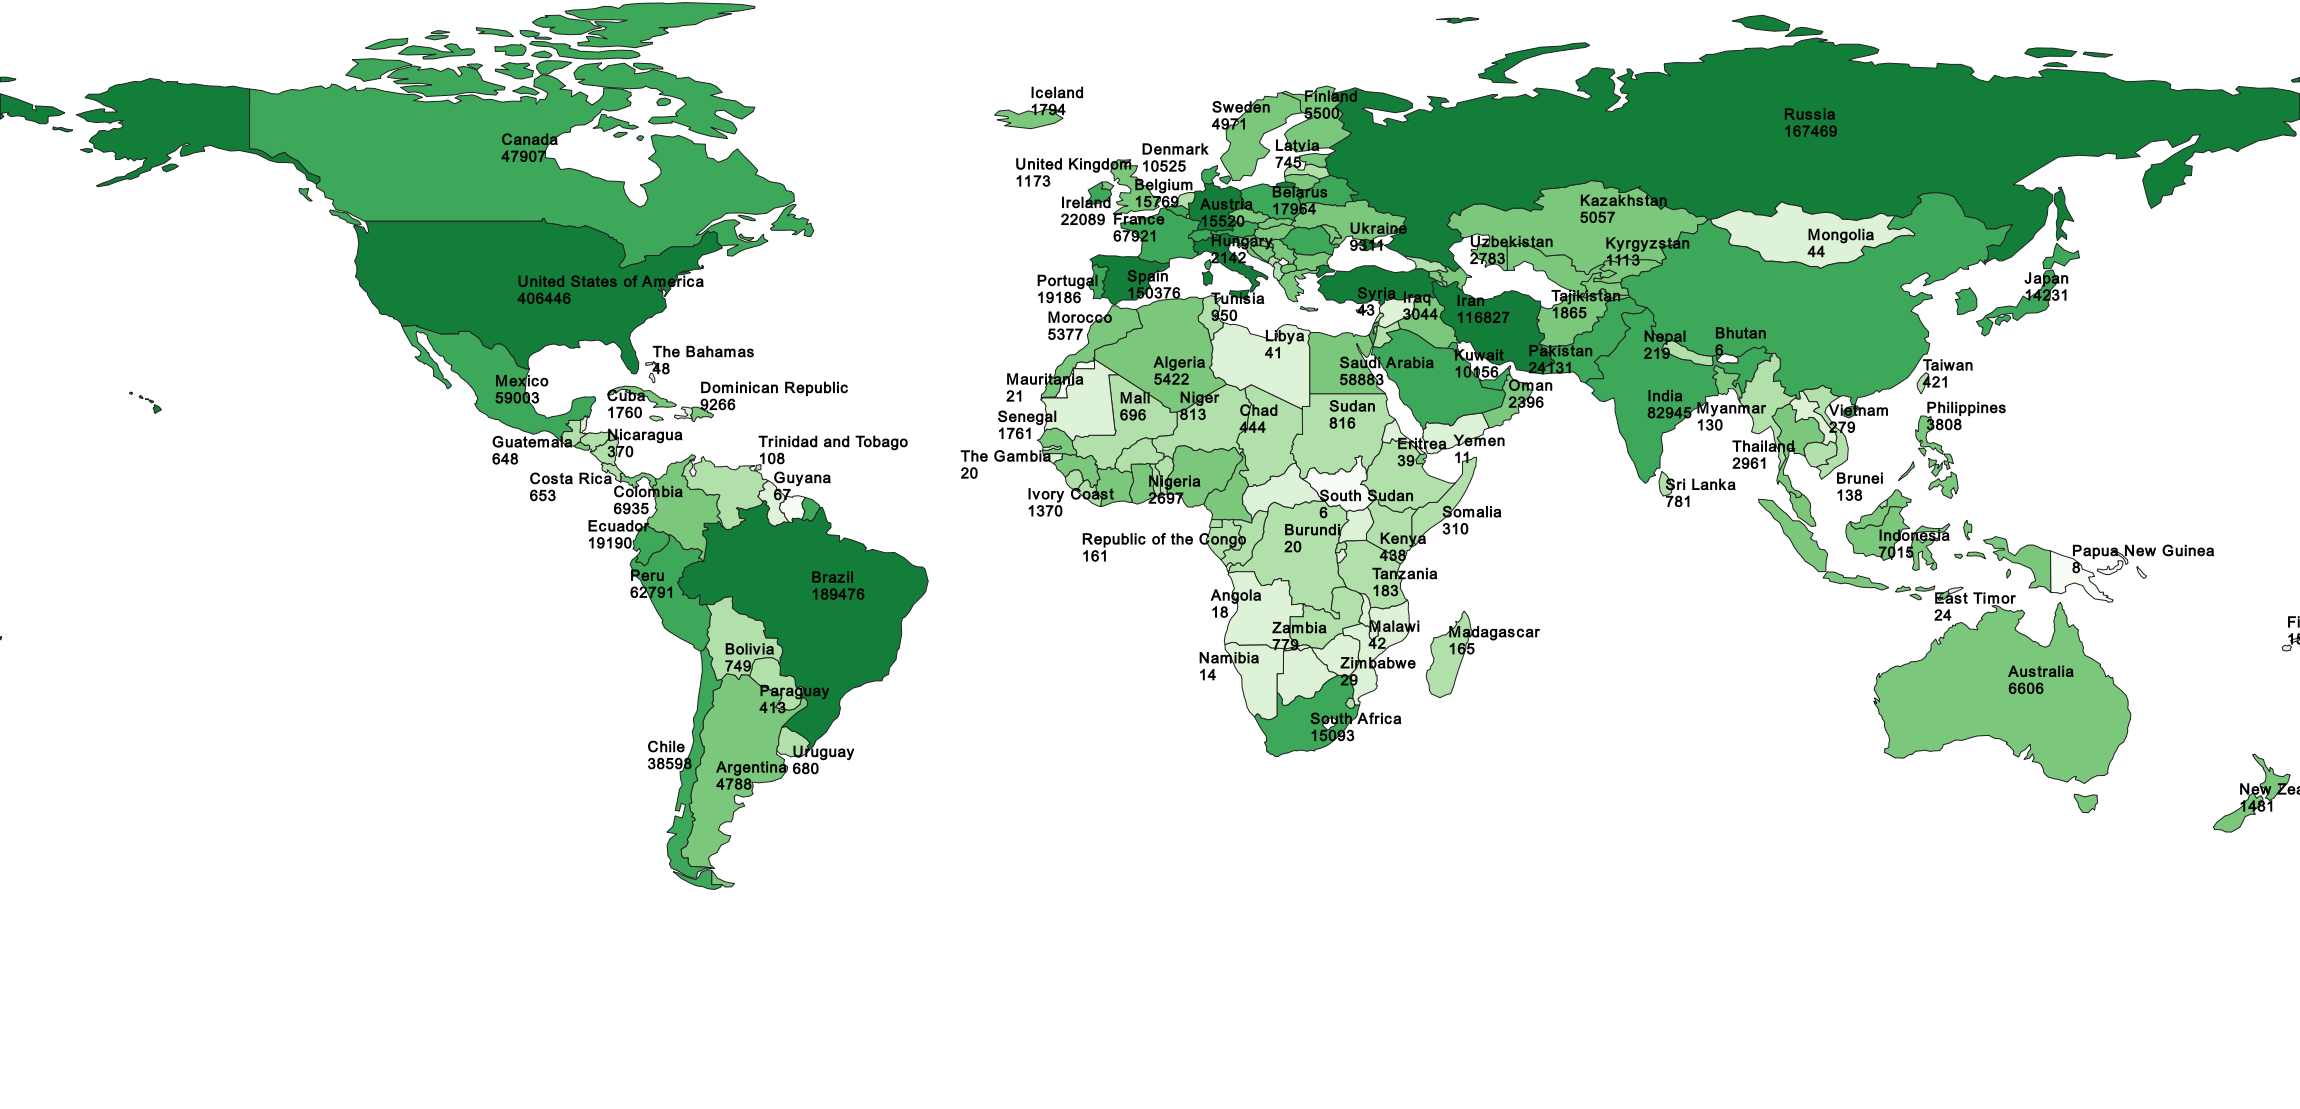

In [13]:
xt = map_layer.extent()
#print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([map_layer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)          
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()



display(HTML("<div style = 'padding: 30px '>"
             "<span style='color: #24FF25; font-size:30px;'> Recuperados: "  + str(recovered_total) +"</span>" +
             "</div>")
       )
image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/Mundo_Recuperados.png',"PNG" )
Image( imgbuf.data() )

In [14]:
estilo = os.path.join(os.getcwd(), "Data\estilo_vermelho.qml")
print(estilo)
r=map_layer.loadNamedStyle( estilo, True)

D:\GitHub\Epidemiologia\Data\estilo_vermelho.qml


Gerar mapa com 2300 por 1109


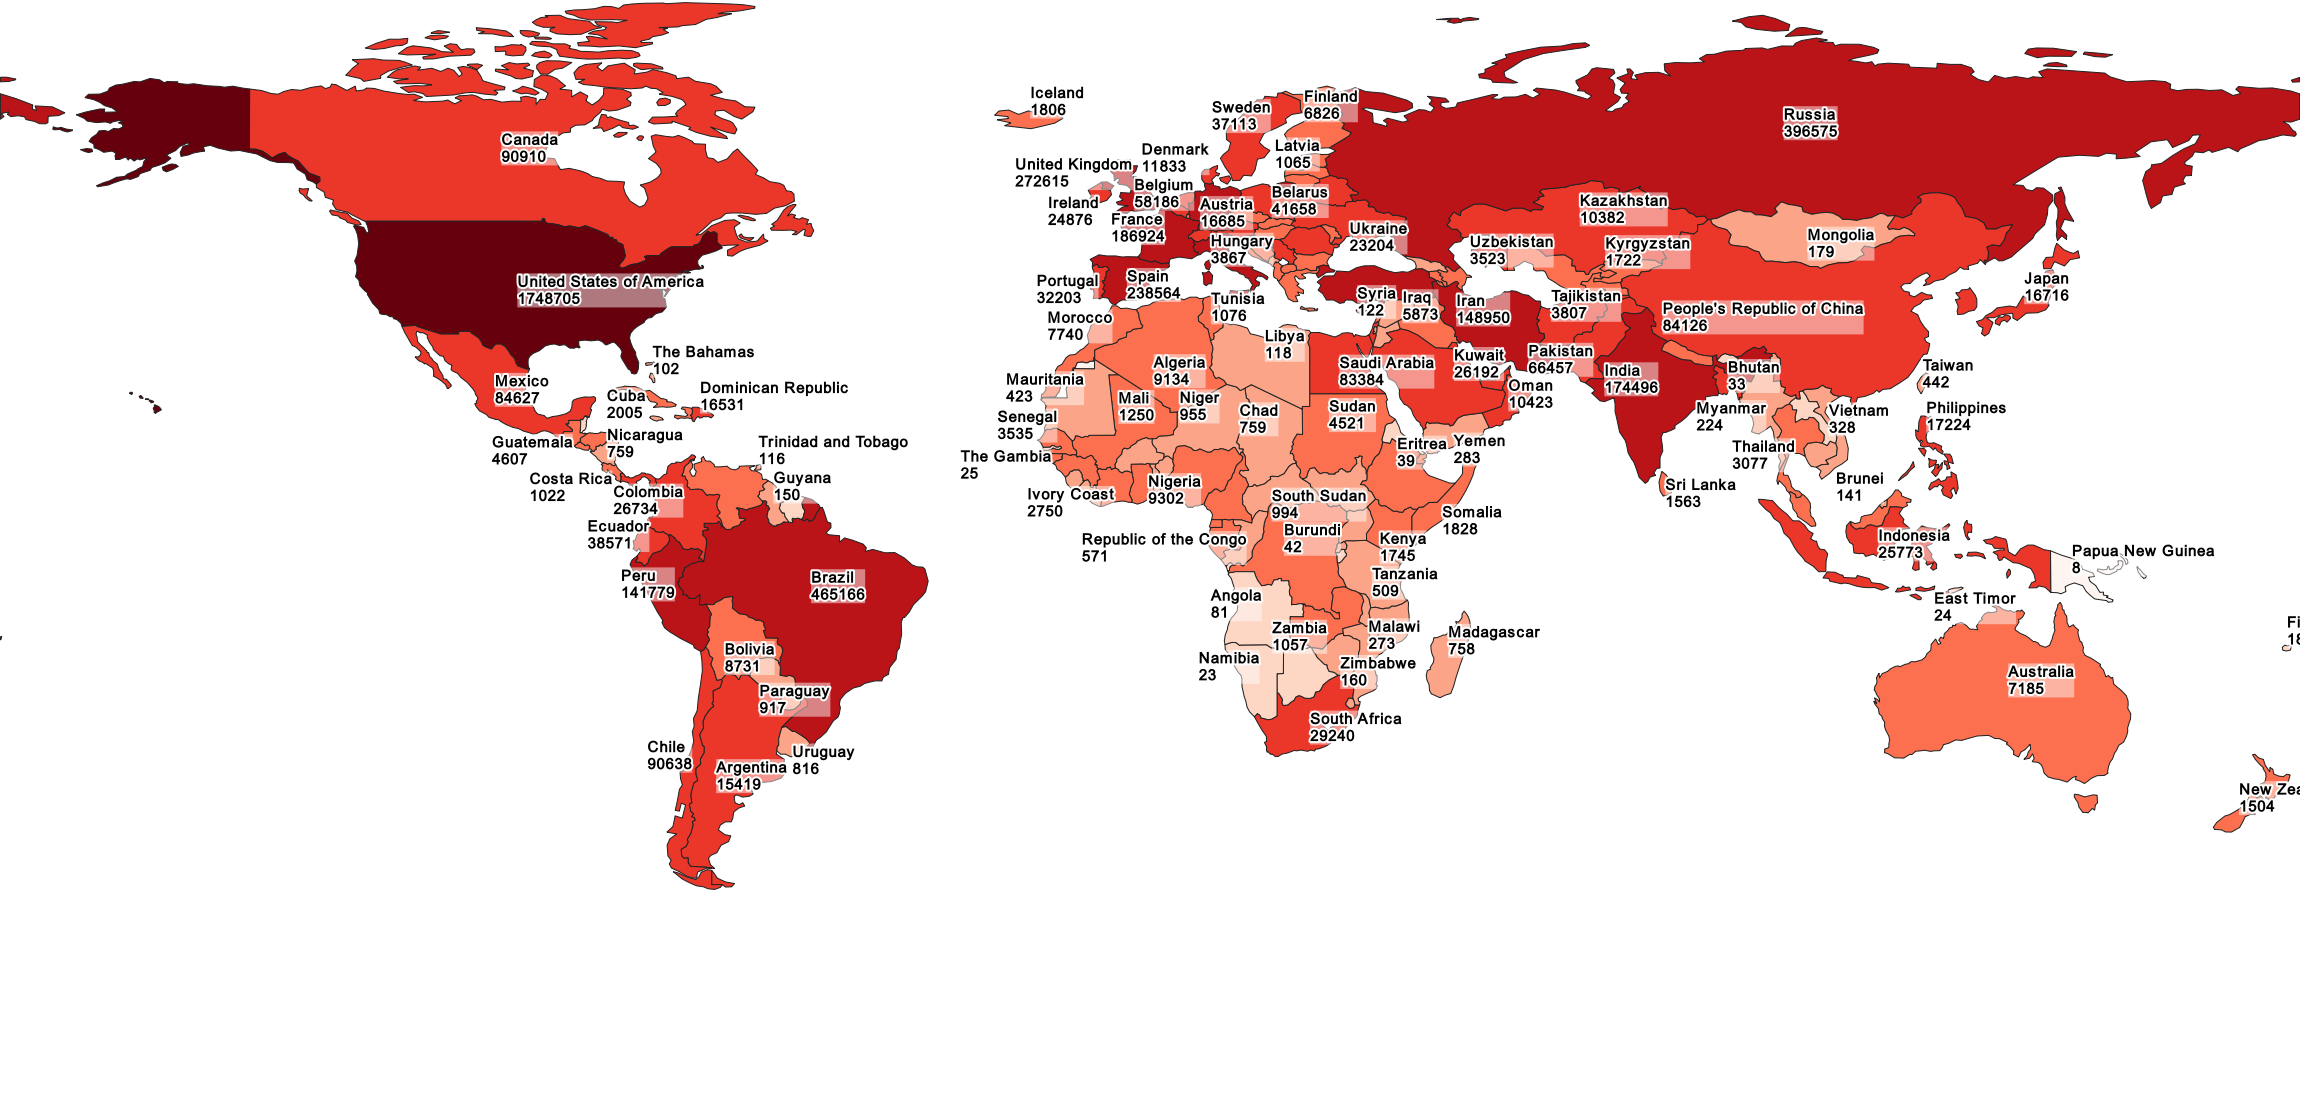

In [15]:
xt = map_layer.extent()
#print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([map_layer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)          
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()



display(HTML("<div style = 'padding: 30px '>"
             "<span style='color: #f51b1b; font-size:30px;'> Casos: "  + str(confirmed_total) +"</span>" +
             "</div>")
       )
image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/Mundo_Confirmados.png',"PNG" )
Image( imgbuf.data() )